In [1]:
# from hikyuu import *
# from hikyuu.indicator import Indicator, IndicatorImp
import sys
sys.path.append('~/.local/lib/python3.12/site-packages/')
from hikyuu.interactive import *

Initialize hikyuu_2.5.5_202503221446_RELEASE_linux_x64 ...
2025-03-24 03:35:04.015 [HKU-I] - current python version: 3.12.9 (main.cpp:66)


2025-03-24 03:35:06,930 [INFO] runing in interactive session [<module>] (/home/lsder/.local/lib/python3.12/site-packages/hikyuu/__init__.py:118) [hikyuu::hku_info]
2025-03-24 03:35:06,931 [INFO] running in jupyter [<module>] (/home/lsder/.local/lib/python3.12/site-packages/hikyuu/__init__.py:125) [hikyuu::hku_info]


2025-03-24 03:35:06.934 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-03-24 03:35:06.936 [HKU-I] - Loading market information... (StockManager.cpp:485)
2025-03-24 03:35:06.936 [HKU-I] - Loading stock type information... (StockManager.cpp:503)
2025-03-24 03:35:06.936 [HKU-I] - Loading stock information... (StockManager.cpp:405)
2025-03-24 03:35:07.054 [HKU-I] - Loading stock weight... (StockManager.cpp:521)
2025-03-24 03:35:07.232 [HKU-I] - Loading block... (StockManager.cpp:113)
2025-03-24 03:35:07.233 [HKU-I] - Loading KData... (StockManager.cpp:117)
2025-03-24 03:35:07.234 [HKU-I] - Preloading day kdata to buffer (max: 100000)! (StockManager.cpp:163)
2025-03-24 03:35:07.235 [HKU-I] - 0.30s Loaded Data. (StockManager.cpp:125)


In [2]:
get_hub_name_list()
update_hub("lsder")
get_part_name_list("lsder", 'ind')

['lsder.ind.市净率',
 'lsder.ind.累积收益率',
 'lsder.ind.动态市盈率',
 'lsder.ind.布林线',
 'lsder.ind.布林线回踩中轨',
 'lsder.ind.多空线',
 'lsder.ind.开始反转',
 'lsder.ind.射击之星',
 'lsder.ind.ama',
 'lsder.ind.RPS10',
 'lsder.ind.通达信百变一阳指',
 'lsder.ind.通达信向上跳空',
 'lsder.ind.静态市盈率',
 'lsder.ind.对数收益率',
 'lsder.ind.emv']

In [3]:

#构造指标公式
# pp_ind=get_part("lsder.ind.开始反转")
# VAR8=pp_ind()
VAR2 =REF(LOW(),1)
VAR3 =SMA(ABS(LOW()-VAR2()),3,1)/SMA(MAX(LOW()-VAR2(),0.001),3,1)*100
VAR4 =EMA(VAR3()*10,3)
VAR5 =LLV(LOW(),13)
VAR6 =HHV(VAR4(),13)
VAR7 =EMA(IF(LOW()<=VAR5(),(VAR4()+VAR6()*2)/2,0),3)/618
VAR8 =IF(VAR7()>500,500,VAR7())
XG2 =IF(VAR8()>1,1,0)
# pp_ind2=get_part("lsder.ind.多空线")
# DKXC= pp_ind2()
N  = 10  
DKXC = EMA((CLOSE() + HIGH() + LOW())/3, N)
XG4 = (DKXC >= REF(DKXC, 1)) & ( LOW() >= DKXC )
# # XG2 =VAR8>1 & "KDJ.J">REF("KDJ.J",1) & REF("KDJ.J",1)<REF("KDJ.J",2)
# # XG3 =VAR8>0.1 & VAR8<1 & "KDJ.J">REF("KDJ.J",1) & REF("KDJ.J",1)<REF("KDJ.J",2)
RESULT= XG2 & XG4

In [4]:
s = sm['sz000739']
q=Query(-100)
k=s.get_kdata(q)
values_np = RESULT(k).to_np()
# 打印 numpy 数组
print(values_np)

[nan  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


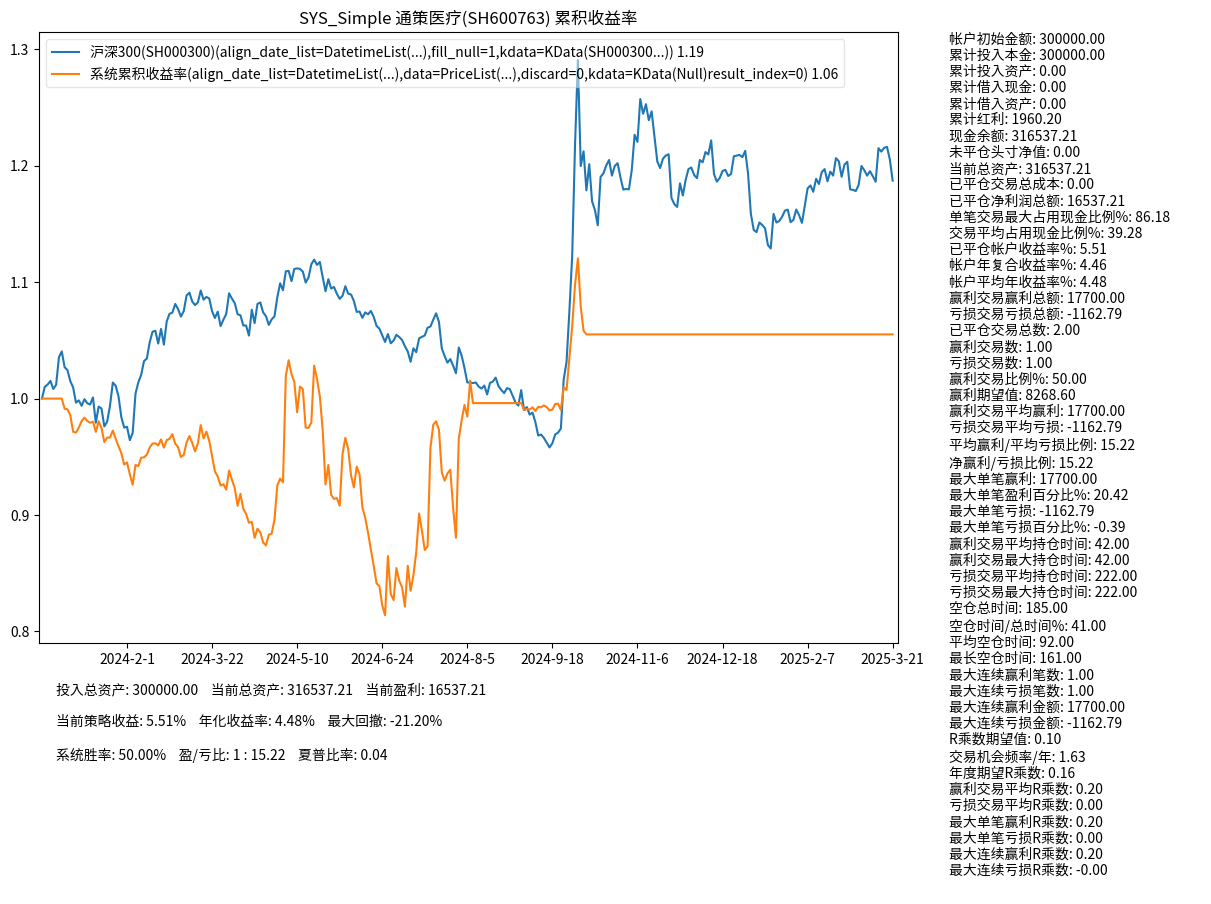

In [13]:
s = sm['sh600763']

#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(init_cash = 300000)
my_sg = SG_OneSide(RESULT,True)
#固定每次买入1000股
my_mm = MM_FixedCount(1000)
my_sys = SYS_Simple(tm=my_tm, sg=my_sg, mm=my_mm)



# 设置盈利目标
# mypg=PG_FixedPercent(0.1)
# # mypg=PG_FixedHoldDays(5)
# # mypg=PG_NoGoal()
# my_sys.pg=mypg


myst=ST_Saftyloss(10,3,2)
my_sys.st=myst
mytp=ST_FixedPercent(0.1)
my_sys.tp=mytp
my_sys.set_param("buy_delay", False)

my_sys.run(s,Query(-2000))
my_sys.performance()



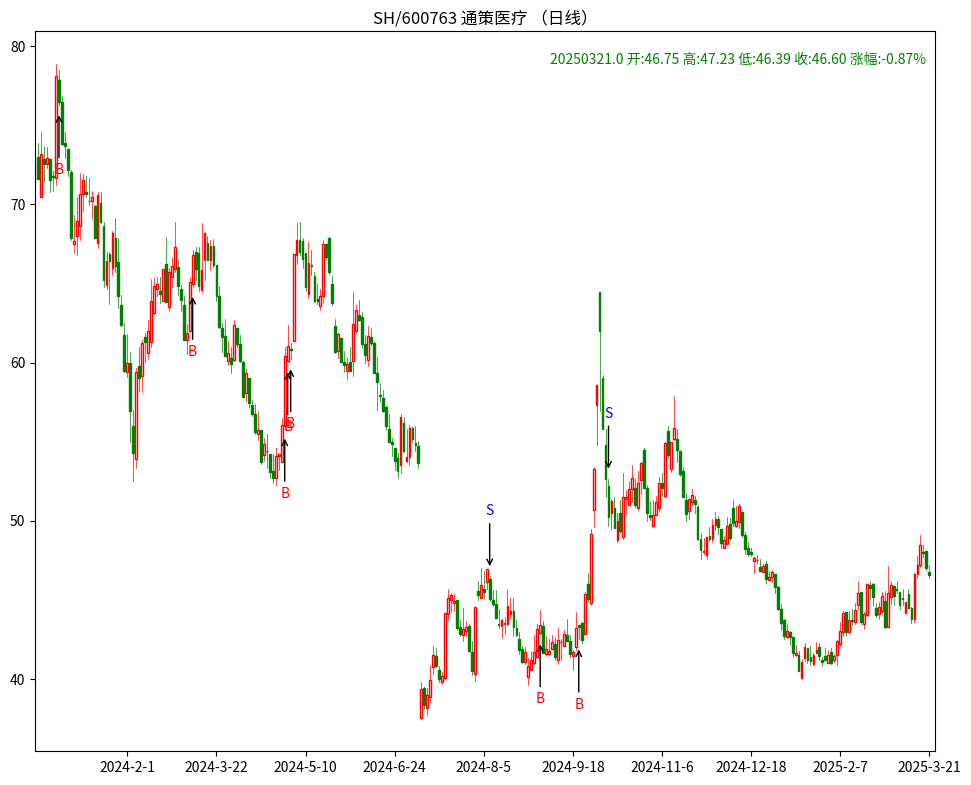

In [12]:
my_sys.plot()

In [ ]:
zsbk_sh50 = sm.get_block("指数板块", "上证50")
stks = [s for s in zsbk_sh50]
my_se=SE_Signal(stks,my_sys)

my_se.get_selected(Datetime(20250307))
# my_se.reset()
# my_se.getProtoSystemList()

#可以作为选股器与通达信选股结果做对比

SystemWeightList[]

In [95]:
# my_se.get_selected(Datetime(20250318))

# 假设 my_se 是一个已经初始化的选择器对象
# 这里我们简单模拟一个示例，实际使用时需要替换为真实的对象
# 例如，在实际中可能是 SignalSelector 等
# my_se = SignalSelector() 

# 定义日期区间
start_date = Datetime(20240101)
end_date = Datetime(20250325)

# 获取日期范围内的所有日期
date_range = get_date_range(start_date, end_date)

# 遍历日期区间
for date in date_range:
    # 调用 get_selected 方法获取结果
    result = my_se.get_selected(date)
    
    # 检查结果是否为空
    if result:
        print(f"日期: {date}, 结果: {result}")

In [ ]:
my_se=SE_Signal(stks, my_sys)
my_af = AF_EqualWeight()
my_pf = PF_Simple(tm=crtTM(Datetime(20250101)), af=my_af, se=my_se, adjust_cycle=1,
                adjust_mode='day',  delay_to_trading_day=True)

In [ ]:





query = Query(Datetime(20250101))
my_pf.run(query, 1)

my_pf.tm.tocsv(".")
my_pf.performance()
